In [33]:
import pandas as pd
df = pd.read_csv('./listings.csv')


In [34]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [35]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.027200e+04,1.027200e+04,0.0,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,7672.000000,10272.000000,10272.000000
mean,2.604226e+07,9.482466e+07,NaN,78723.162481,30.281591,-97.752913,255.656542,8.240654,31.720600,1.280021,19.581192,122.290401
std,1.500293e+07,1.111380e+08,NaN,20.827207,0.061041,0.058415,513.284268,23.416609,68.107864,1.697720,67.081990,138.467978
min,2.265000e+03,2.300000e+01,NaN,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.319740e+07,1.098138e+07,NaN,78704.000000,30.245163,-97.770485,82.000000,1.000000,0.000000,0.160000,1.000000,0.000000
50%,2.580636e+07,4.428986e+07,NaN,78722.000000,30.270175,-97.745035,136.000000,2.000000,5.000000,0.650000,1.000000,59.000000
75%,4.006138e+07,1.410198e+08,NaN,78745.000000,30.305237,-97.721430,250.000000,3.000000,29.000000,1.790000,4.000000,263.250000
max,4.811152e+07,3.879780e+08,NaN,78759.000000,30.515280,-97.560620,16264.000000,999.000000,951.000000,34.030000,358.000000,365.000000


In [36]:
df.info()
#there are 5 null values in host name and mny null values in last_review and reviews_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10272 non-null  int64  
 1   name                            10272 non-null  object 
 2   host_id                         10272 non-null  int64  
 3   host_name                       10267 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10272 non-null  int64  
 6   latitude                        10272 non-null  float64
 7   longitude                       10272 non-null  float64
 8   room_type                       10272 non-null  object 
 9   price                           10272 non-null  int64  
 10  minimum_nights                  10272 non-null  int64  
 11  number_of_reviews               10272 non-null  int64  
 12  last_review                     

In [37]:
df.drop(['last_review', 'reviews_per_month', 'neighbourhood_group'], axis=1, inplace=True)
df.dropna(inplace=True)


In [38]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [39]:
df.room_type.value_counts()

Entire home/apt    7959
Private room       2164
Shared room         133
Hotel room           11
Name: room_type, dtype: int64

In [40]:
df.host_id.nunique()

6768

In [41]:
import geopandas as gpd
neigh = gpd.read_file('./neighbourhoods.geojson')

In [42]:
neigh.head()

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


## top 10 hosts with most number of listings

In [45]:
top_host = df.groupby('host_name')['calculated_host_listings_count'].sum().reset_index()
top_host_10 = top_host.sort_values('calculated_host_listings_count', ascending=False)[:10].reset_index(drop=True)
top_host_10.rename(columns={'calculated_host_listings_count': 'listings_count'}, inplace=True)
top_host_10


,host_name,listings_count
0,Kia,129764
1,WanderJaunt,17161
2,TurnKey Vacation Rentals,7214
3,Martin,6743
4,Renters Club,3136
5,Madalynn,2304
6,Christian,2029
7,Above,1849
8,Lodgewell,1444
9,Evolve Vacation Rental,1444


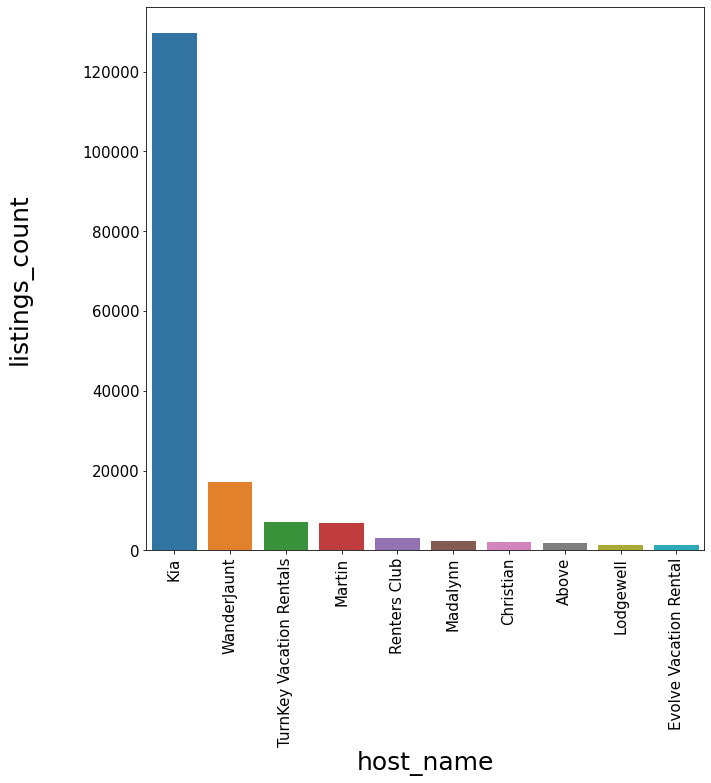

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('host_name', fontsize=25)
plt.ylabel('listings count', fontsize=25, labelpad=50)
sns.barplot(x='host_name', y='listings_count', data=top_host_10)
plt.savefig('top_hosts_most_listings.jpg')

## highest number of listings with geometry

In [47]:
top_neigh = df.groupby('neighbourhood')['calculated_host_listings_count'].sum().reset_index()
top_neigh = top_neigh.sort_values('calculated_host_listings_count', ascending=False).reset_index(drop=True)
top_neigh.head()


,neighbourhood,calculated_host_listings_count
0,78745,26733
1,78751,23334
2,78758,22029
3,78735,20357
4,78702,19429


In [48]:
neigh.neighbourhood = neigh.neighbourhood.astype('int64')
merged = pd.merge(left=top_neigh, right=neigh, how='outer', on='neighbourhood')

In [49]:
merged
#hence neighbourhood is mapped with respective polygons

,neighbourhood,calculated_host_listings_count,neighbourhood_group,geometry
0,78745,26733,None,"MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ..."
1,78751,23334,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ..."
2,78758,22029,None,"MULTIPOLYGON (((-97.71223 30.34801, -97.71246 ..."
3,78735,20357,None,"MULTIPOLYGON (((-97.86241 30.29700, -97.86216 ..."
4,78702,19429,None,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
5,78701,15938,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
6,78704,13739,None,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
7,78729,10191,None,"MULTIPOLYGON (((-97.72138 30.47358, -97.72091 ..."
8,78754,6326,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
9,78717,6299,None,"MULTIPOLYGON (((-97.70740 30.47482, -97.70753 ..."


In [50]:
df_temp = df.loc[:, ['neighbourhood', 'room_type']]
df_temp


,neighbourhood,room_type
0,78702,Entire home/apt
1,78702,Private room
2,78702,Entire home/apt
3,78704,Entire home/apt
4,78729,Private room
...,...,...
10267,78758,Entire home/apt
10268,78758,Entire home/apt
10269,78729,Entire home/apt
10270,78701,Entire home/apt


In [51]:
neigh_gdf = gpd.GeoDataFrame(merged, geometry=merged.geometry)

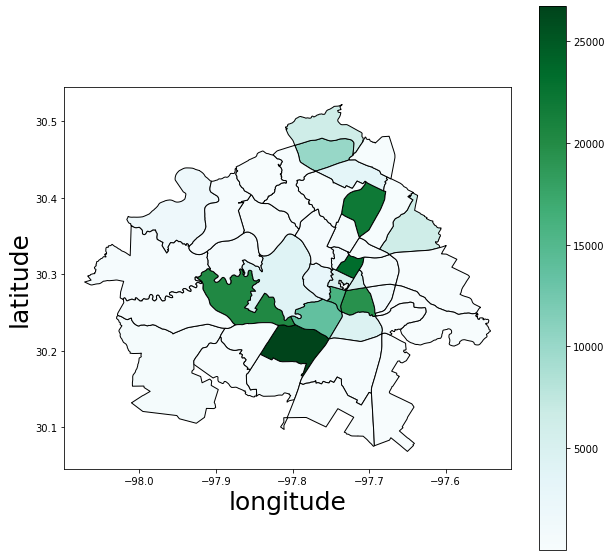

In [59]:
neigh_gdf.plot(column='calculated_host_listings_count', legend=True, 
               cmap='BuGn', edgecolor='black', figsize=(10, 10))
plt.xlabel('longitude', fontsize=25)
plt.ylabel('latitude', fontsize=25)
plt.savefig('highest-number-listings-geometry.jpg')

## thematic map of neighbourhood broken by  single and entire home

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

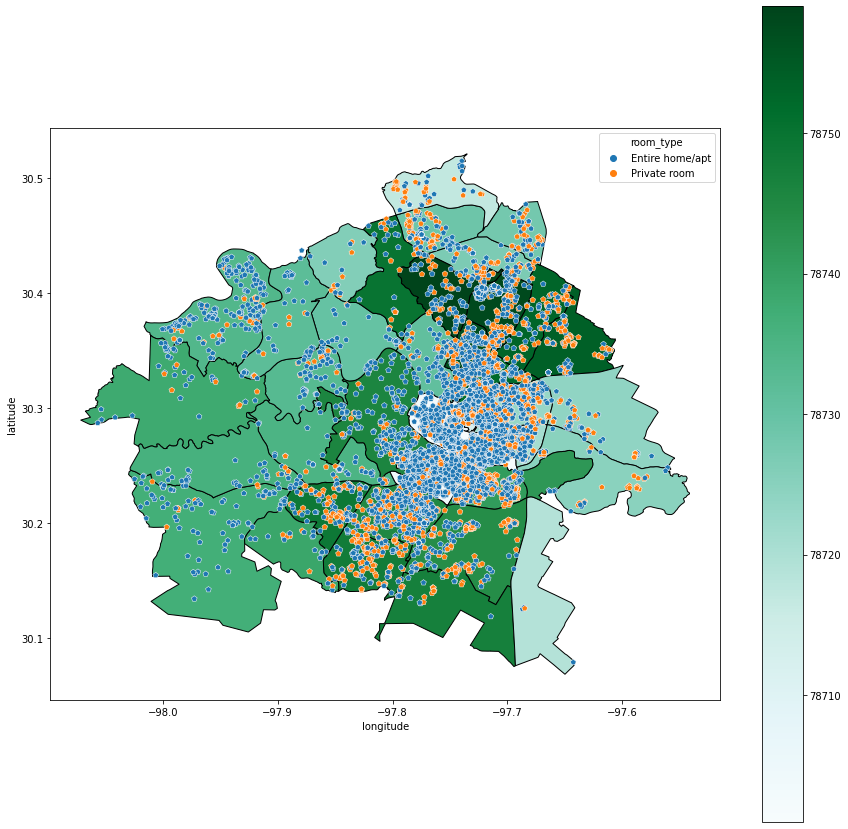

In [54]:
df_private_or_entire = df[(df.room_type == 'Entire home/apt') | (df.room_type == 'Private room')]



# leg_kwds = {
#             'ncol': 3, 'bbox_to_anchor': (1, 1.03), 
#            'loc': 'upper left'}


neigh_gdf.plot(column='neighbourhood', legend=True, cmap='BuGn',
               edgecolor='black', figsize=(15, 15))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', 
                data=df_private_or_entire, marker='p')
#dark color means more value of neighbourhood
plt.savefig('thematic-map-neighbourhood-broken-by-single-and-entire-home')